In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import numpy as np

In [36]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

# Youn Innovation Plots (testing)

Goal - create similar plots to Figure 1/2 in Youn et al, 2016

Current restriction - dates are 1980-2019 (need to find data from 1976 through 2022)

In [37]:
def build_month_increments(start, stop):
    """ Build all monthly increments from the start year to stop year in the
    format YEAR-MONTH

    Args:
        start (int): start year of increments
        stop (int): end year of increments

    Returns:
        list: list of strings holding the YEAR-MONTH increments
    """
    months = []
    while start <= stop:
        for month in [
                "01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
                "11", "12"
        ]:
            months.append(str(start) + "-" + month)
        start += 1

    return months

## Figure 1a

X-axis: years


Y-axis: counts of:
- total unique fragments
- total unique compounds
- total unique patents


### Cumulative Unique Fragments

In [38]:

cum_frags = []

for month in tqdm(build_month_increments(1980,2019)):

    novel_frags = pickle.load(open(f"Data/AssemblyValues/Fragments/NewFrags/newFrags_{month}.p", "rb"))

    if len(cum_frags) == 0:
        cum_frags.append(len(novel_frags))
    else:
        cum_frags.append(len(novel_frags) + cum_frags[-1])

  0%|          | 0/480 [00:00<?, ?it/s]

100%|██████████| 480/480 [00:09<00:00, 49.30it/s]


In [14]:
print(cum_frags)

[464, 924, 1388, 1818, 2267, 2718, 3158, 3611, 4064, 4495, 4983, 5409, 5844, 6258, 6716, 7186, 7618, 8092, 8524, 8957, 9396, 9815, 10259, 10735, 11159, 11586, 12005, 12431, 12849, 13295, 13793, 14300, 14749, 15237, 15701, 16114, 16615, 17089, 17487, 17942, 18388, 18852, 19308, 19821, 20266, 20719, 21156, 21600, 22043, 22487, 22973, 23412, 23883, 24304, 24740, 25167, 25610, 26088, 26541, 26970, 27434, 27873, 28347, 28810, 29249, 29670, 30093, 30551, 31000, 31449, 31924, 32398, 32871, 33299, 33745, 34226, 34713, 35162, 35677, 36098, 36551, 37004, 37427, 37867, 38313, 38708, 39158, 39628, 40075, 40526, 40997, 41505, 41979, 42426, 42902, 43355, 43791, 44257, 44728, 45150, 45623, 46063, 46526, 46995, 47450, 47933, 48391, 48880, 49341, 49827, 50303, 50755, 51211, 51680, 52171, 52622, 53135, 53583, 54057, 54490, 54986, 55439, 55918, 56335, 56774, 57252, 57686, 58138, 58644, 59118, 59586, 60026, 60466, 60910, 61358, 61802, 62282, 62763, 63249, 63690, 64187, 64670, 65116, 65552, 65986, 66417, 6

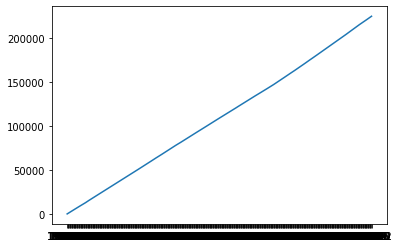

In [15]:
# Total unique fragments over time
plt.plot(build_month_increments(1980,2019), cum_frags)

### Cumulative Unique compounds

In [39]:
#Sticking with 1980-2019 for first pass at graph

network_stats = pd.read_csv("Data/NetworkStats/networkStats_byMonth.csv")
cum_cpds = list(network_stats[network_stats["month"] <= "2019-12"]["Cpd Nodes"])
print(cum_cpds)

[551235, 560688, 567358, 579361, 586594, 594382, 602796, 612182, 623289, 634161, 642029, 651932, 663377, 672749, 686442, 695723, 705310, 716475, 726587, 736886, 748222, 756656, 764055, 774789, 782305, 790002, 800093, 808708, 817659, 828859, 835019, 843928, 853010, 859875, 867677, 875016, 884529, 893070, 901704, 907550, 915443, 923124, 929069, 938764, 947975, 955937, 967339, 974567, 982104, 990101, 999279, 1009429, 1020157, 1028815, 1037717, 1048270, 1056798, 1067704, 1077397, 1086973, 1094906, 1102054, 1111340, 1122853, 1133707, 1142702, 1153622, 1165746, 1176993, 1189797, 1200463, 1210360, 1221238, 1230138, 1239473, 1250225, 1259312, 1269290, 1282947, 1292548, 1302295, 1311593, 1321792, 1332273, 1341154, 1349723, 1361281, 1371363, 1379694, 1390891, 1402689, 1411889, 1426080, 1435624, 1444409, 1452635, 1463404, 1470141, 1482211, 1491185, 1501058, 1513043, 1523889, 1536271, 1547366, 1557159, 1571658, 1580633, 1593401, 1604854, 1616184, 1629196, 1644698, 1656036, 1667420, 1682474, 169448

### Cumulative Patents

In [40]:
#Sticking with 1980-2019 for first pass at graph

patent_df = pd.read_csv("Data/NetworkStats/patent_stats.csv")
patent_subdf = patent_df[patent_df["month"] <= "2019-12"]
cum_patents = list(patent_subdf[patent_subdf["month"] >= "1980-01"]["totalPatents"])
print(cum_patents)


[70772, 72586, 74384, 76490, 78287, 80076, 81992, 83705, 85829, 88218, 90261, 92348, 94672, 96708, 99065, 101643, 103989, 106401, 108624, 110793, 113588, 116023, 118366, 120998, 123574, 125627, 128292, 130664, 133173, 136003, 138236, 140552, 143043, 145241, 147562, 149897, 152345, 154842, 157704, 159901, 162524, 165095, 167507, 170220, 172980, 175781, 178702, 181059, 183729, 186617, 189743, 192568, 195714, 198365, 201008, 203882, 206650, 210026, 212737, 215593, 218617, 221059, 223748, 227170, 230677, 233699, 237174, 240562, 243669, 247315, 250273, 253424, 257012, 259829, 262781, 266659, 269873, 272909, 276644, 279971, 283493, 286973, 290197, 293881, 297182, 299582, 303436, 307401, 311031, 314546, 318205, 321412, 325734, 329191, 332523, 335786, 339375, 342311, 346513, 350054, 353584, 357734, 361181, 365297, 369112, 372722, 377220, 380638, 386014, 390892, 397103, 401452, 406565, 411075, 415046, 420150, 424583, 429318, 433864, 437951, 443357, 447799, 452816, 457235, 462844, 467518, 471748

Text(0, 0.5, 'Cumulative Count')

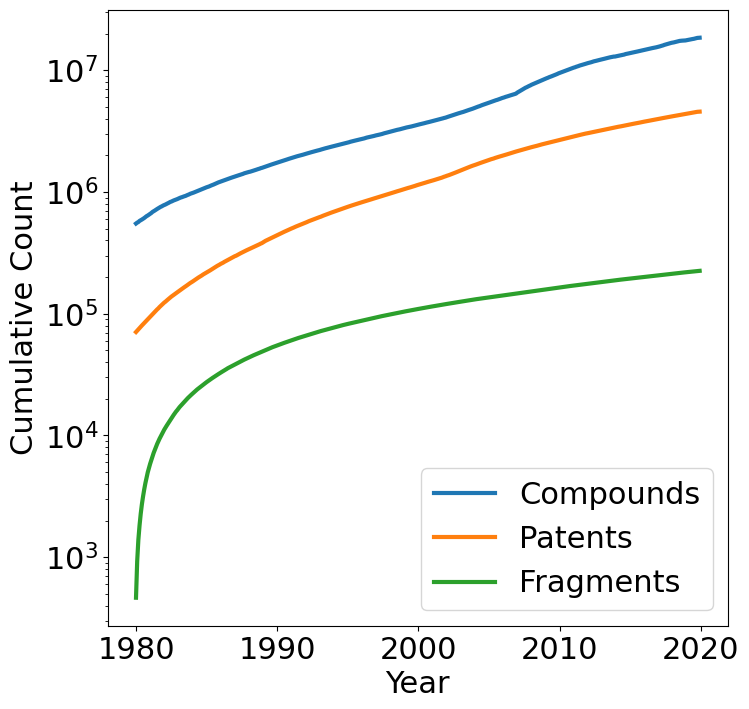

In [41]:
plt.subplots(figsize=(8,8))

xs = list(np.arange(1980, 2020, 1/12))

plt.plot(xs, cum_cpds, label="Compounds", linewidth=3)
plt.plot(xs, cum_patents, label="Patents", linewidth=3)
plt.plot(xs, cum_frags, label="Fragments", linewidth=3)

plt.legend()
plt.yscale("log")

plt.xlabel("Year")
plt.ylabel("Cumulative Count")

# Figure 1b

x-axis: Cumulative patents

y-axis: Counts of:
- compounds
- fragments

Text(0, 0.5, 'Cumulative Count')

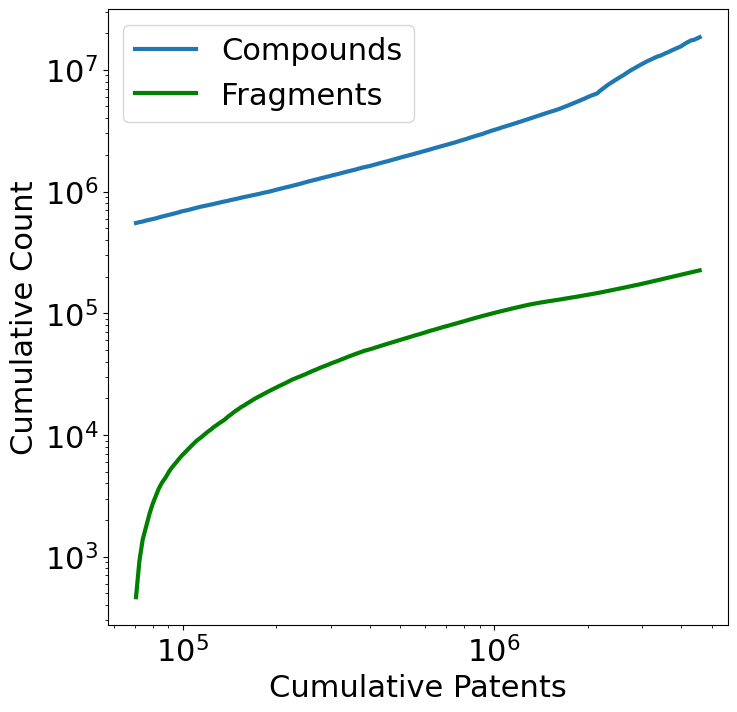

In [34]:
plt.subplots(figsize=(8,8))

plt.plot(cum_patents, cum_cpds, label="Compounds", linewidth=3)
plt.plot(cum_patents, cum_frags, label="Fragments", linewidth=3, color="green")

plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Cumulative Patents")
plt.ylabel("Cumulative Count")

## Figure 2

x-axis: cumulative fragments

y-axis: cumulative compounds

Inset: MA values over time

Eventually might have number of fragments per compound as a separate line (going off Figure 2 in "Sara Notes & Ideas")

In [43]:
MA_df_months = pd.read_csv("../Data/AssemblyValues/MA_df_months_FULL.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Data/AssemblyValues/MA_df_months_FULL.csv'

Text(0, 0.5, 'Cumulative Count')

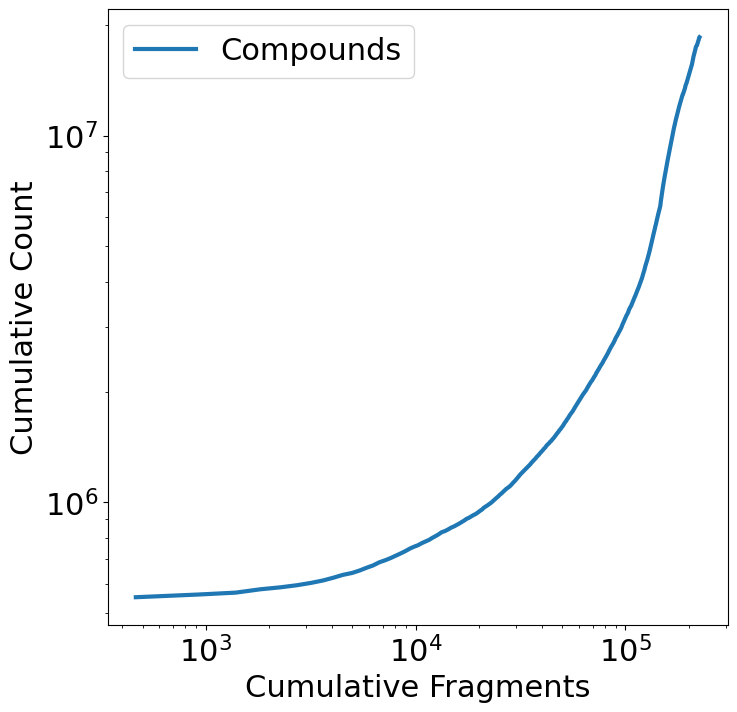

In [42]:
plt.subplots(figsize=(8,8))

plt.plot(cum_frags, cum_cpds, label="Compounds", linewidth=3)

#MA inset
plt.plot(MA_df_months["date"], MA_df_months["avg"], color="mediumblue",
            linewidth=3, markersize=10, alpha=0.8, label="MA Average")

plt.fill_between(MA_df_months["date"], MA_df_months["avg"] + MA_df_months["iqr"]/2, 
                MA_df_months["avg"] - MA_df_months["iqr"]/2, alpha=0.5, color=palette[6])

plt.legend(loc="upper left", prop={"size":"22"})
plt.xlabel("Year")
plt.ylabel("Molecular Assembly Index")
plt.xlim(dt.date(1976,1,1), dt.date(2024,1,1))

plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Cumulative Fragments")
plt.ylabel("Cumulative Count")